In [1]:
# Data Manipulattion
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dependencies
%matplotlib inline

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Titanic Dataset
train = pd.read_csv('/Users/fareenkhan/Downloads/TitanicData/train.csv')
test_t = pd.read_csv('/Users/fareenkhan/Downloads/TitanicData/test.csv')
test = test_t

In [3]:
train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
test.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

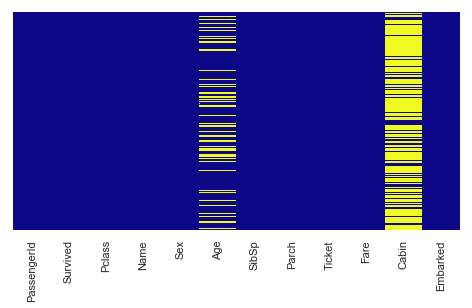

In [9]:
# Visualization of Missing variables in train dataset
plt.figure(figsize=(8,4))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='plasma')

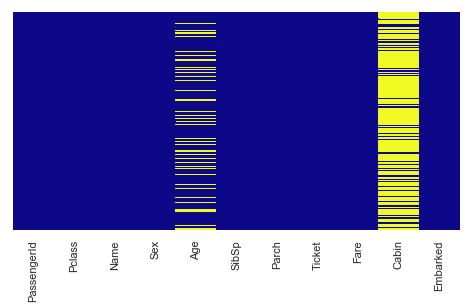

In [10]:
#Visualization of missing variables in test dataset
plt.figure(figsize=(8,4))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [11]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(test['Age'].median(), inplace = True)

test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [12]:
#Excluding Ticket, Cabin and PassengerId features.
train = train.drop(columns=['Ticket','Cabin','PassengerId'], axis=1)
test = test.drop(columns=['Ticket','Cabin', 'PassengerId'], axis=1)

In [13]:
print('Check the nan value in train data')
print(train.isnull().sum())
print('___'*30)
print('Check the nan value in test data')
print(test.isnull().sum())

Check the nan value in train data
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
__________________________________________________________________________________________
Check the nan value in test data
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


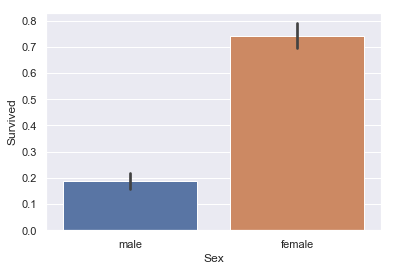

In [14]:
#Sex Feature
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


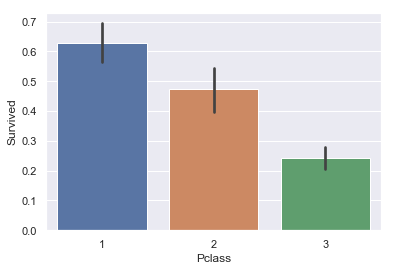

In [15]:
#Pclass Feature
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


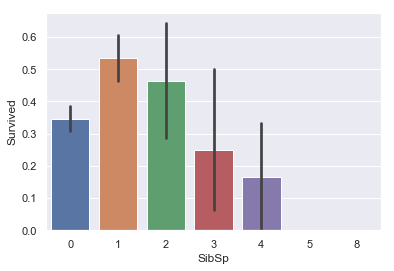

In [16]:
#SibSp Feature
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

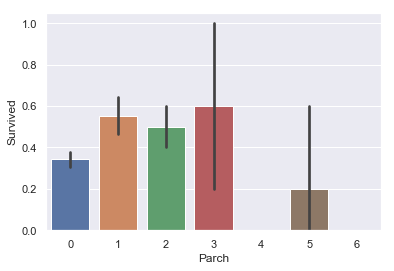

In [17]:
#Parch Feature
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [18]:
titanic = [train,test]
#extract a title for each Name in the train and test datasets
for dataset in titanic:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(dataset['Title'], dataset['Sex'])


Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2

In [19]:
for dataset in titanic:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona','Countess', 'Lady', 'Sir'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

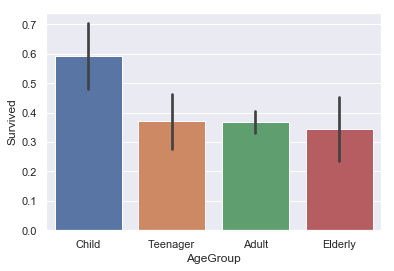

In [20]:
#Age Feature
for dataset in titanic:
    bins = [0, 13, 20, 50, 90]
    labels = ['Child', 'Teenager', 'Adult', 'Elderly']
    age_groups = pd.cut(dataset.Age, bins, labels = labels)
    dataset['AgeGroup'] = age_groups
    
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

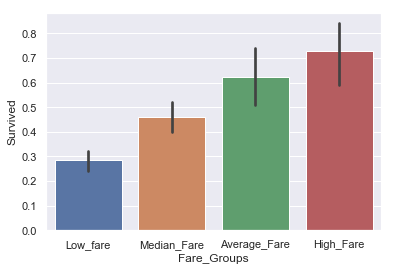

In [21]:
#Fare Feature
for dataset in titanic:
    bins = [0,20,60,100, 250]
    labels = ['Low_fare', 'Median_Fare','Average_Fare','High_Fare']
    fare_Groups = pd.cut(dataset.Fare, bins, labels=labels)
    dataset['Fare_Groups'] = fare_Groups

sns.barplot(x="Fare_Groups", y="Survived", data=train)
plt.show()

In [22]:
train1 = train
test1 = test

titanic1 = [train1,test1]

In [23]:
for dataset in titanic1:
    drop_column = ['Age','Fare','Name']
    dataset.drop(drop_column, axis=1, inplace = True)

In [24]:
test1.head(2)

Pclass     Sex  SibSp  Parch Embarked Title AgeGroup Fare_Groups
0       3    male      0      0        Q    Mr    Adult    Low_fare
1       3  female      1      0        S   Mrs    Adult    Low_fare

In [25]:
train1 = pd.get_dummies(train1, columns = ["Sex","Title","AgeGroup","Embarked","Fare_Groups"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

test1 = pd.get_dummies(test1, columns = ["Sex","Title","AgeGroup","Embarked","Fare_Groups"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])


In [26]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
Survived                  891 non-null int64
Pclass                    891 non-null int64
SibSp                     891 non-null int64
Parch                     891 non-null int64
Sex_female                891 non-null uint8
Sex_male                  891 non-null uint8
Title_Master              891 non-null uint8
Title_Miss                891 non-null uint8
Title_Mr                  891 non-null uint8
Title_Mrs                 891 non-null uint8
Title_Rare                891 non-null uint8
Age_type_Child            891 non-null uint8
Age_type_Teenager         891 non-null uint8
Age_type_Adult            891 non-null uint8
Age_type_Elderly          891 non-null uint8
Em_type_C                 891 non-null uint8
Em_type_Q                 891 non-null uint8
Em_type_S                 891 non-null uint8
Fare_type_Low_fare        891 non-null uint8
Fare_type_Median_Fare     891 non-null u

In [27]:
test1.head(2)

Pclass  SibSp  Parch  Sex_female  Sex_male  Title_Master  Title_Miss  \
0       3      0      0           0         1             0           0   
1       3      1      0           1         0             0           0   

   Title_Mr  Title_Mrs  Title_Rare         ...           Age_type_Teenager  \
0         1          0           0         ...                           0   
1         0          1           0         ...                           0   

   Age_type_Adult  Age_type_Elderly  Em_type_C  Em_type_Q  Em_type_S  \
0               1                 0          0          1          0   
1               1                 0          0          0          1   

   Fare_type_Low_fare  Fare_type_Median_Fare  Fare_type_Average_Fare  \
0                   1                      0                       0   
1                   1                      0                       0   

   Fare_type_High_Fare  
0                    0  
1                    0  

[2 rows x 21 columns]

In [28]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
Pclass                    418 non-null int64
SibSp                     418 non-null int64
Parch                     418 non-null int64
Sex_female                418 non-null uint8
Sex_male                  418 non-null uint8
Title_Master              418 non-null uint8
Title_Miss                418 non-null uint8
Title_Mr                  418 non-null uint8
Title_Mrs                 418 non-null uint8
Title_Rare                418 non-null uint8
Age_type_Child            418 non-null uint8
Age_type_Teenager         418 non-null uint8
Age_type_Adult            418 non-null uint8
Age_type_Elderly          418 non-null uint8
Em_type_C                 418 non-null uint8
Em_type_Q                 418 non-null uint8
Em_type_S                 418 non-null uint8
Fare_type_Low_fare        418 non-null uint8
Fare_type_Median_Fare     418 non-null uint8
Fare_type_Average_Fare    418 non-null u

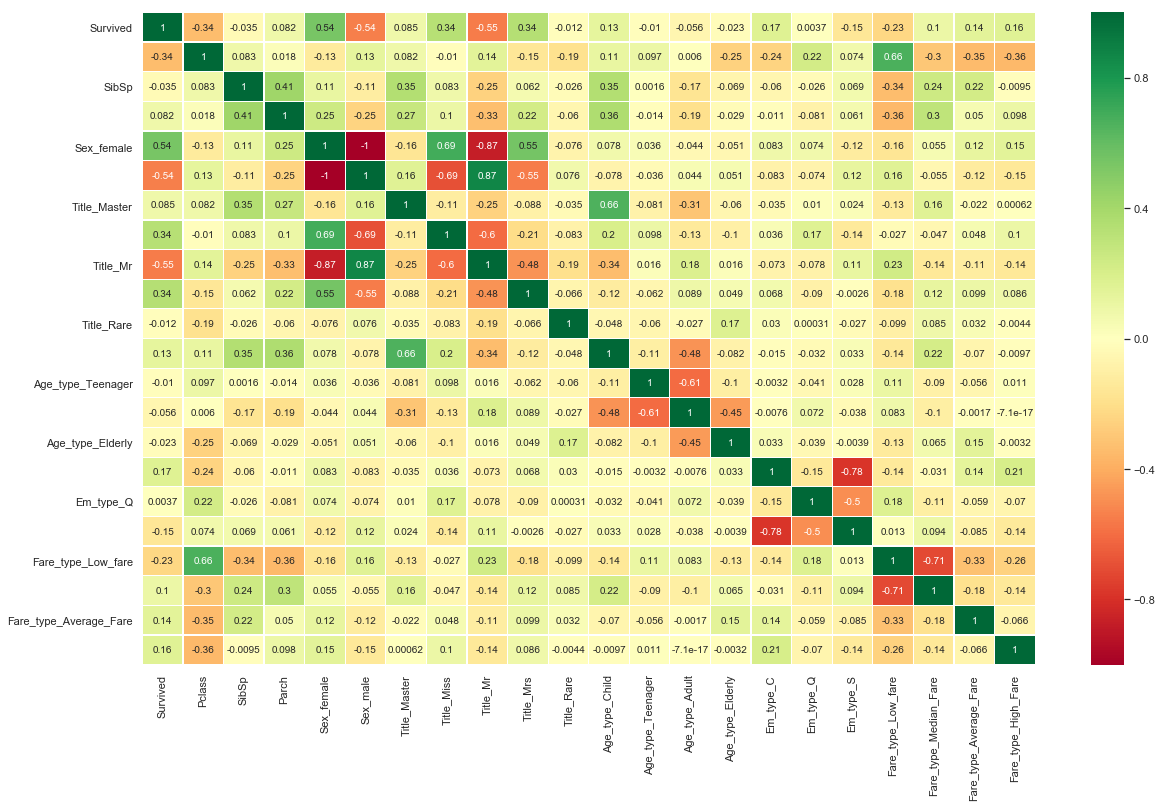

In [29]:
#Correlation
sns.heatmap(train1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

X_train = train1.drop("Survived", axis=1)
X_test = test1

y_train = train1["Survived"]

X_train.shape,X_test.shape,y_train.shape

((891, 21), (418, 21), (891,))

In [31]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) *100,2)
acc_svc



83.5

In [32]:
print(prediction_svm)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [33]:
submission_svm = pd.DataFrame({
        "PassengerId": test_t["PassengerId"],
        "Survived": prediction_svm})
submission_svm.to_csv('submission_SVM.csv', index = False)

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [35]:
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

W0818 13:43:34.186544 140736099283904 deprecation_wrapper.py:119] From /Users/fareenkhan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 13:43:34.248582 140736099283904 deprecation_wrapper.py:119] From /Users/fareenkhan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 13:43:34.252802 140736099283904 deprecation_wrapper.py:119] From /Users/fareenkhan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 13:43:34.336163 140736099283904 deprecation_wrapper.py:119] From /Users/fareenkhan/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimize

Epoch 1/200
891/891 [==============================] - 0s 474us/step - loss: 0.6919 - acc: 0.6117
Epoch 2/200
891/891 [==============================] - 0s 53us/step - loss: 0.6884 - acc: 0.6162
Epoch 3/200
891/891 [==============================] - 0s 80us/step - loss: 0.6810 - acc: 0.6162
Epoch 4/200
891/891 [==============================] - 0s 62us/step - loss: 0.6574 - acc: 0.6162
Epoch 5/200
891/891 [==============================] - 0s 57us/step - loss: 0.6091 - acc: 0.6162
Epoch 6/200
891/891 [==============================] - 0s 64us/step - loss: 0.5625 - acc: 0.6162
Epoch 7/200
891/891 [==============================] - 0s 56us/step - loss: 0.5391 - acc: 0.6162
Epoch 8/200
891/891 [==============================] - 0s 59us/step - loss: 0.5311 - acc: 0.6162
Epoch 9/200
891/891 [==============================] - 0s 55us/step - loss: 0.5261 - acc: 0.6162
Epoch 10/200
891/891 [==============================] - 0s 60us/step - loss: 0.5218 - acc: 0.7879
Epoch 11/200
891/891 [======

In [36]:
prc = model.predict(X_train)
# round predictions
prc = [round(x[0]) for x in prc]
accuracy_score(y_train,prc)*100

84.28731762065095

In [37]:
snum = 0
enum = len(X_test)
prdt2 = model.predict(X_test)      # Predicting values
prdt2 = [round(x[0]) for x in prdt2]   # round predictions
prdt2 = list(map(int,prdt2))
print('Predicted result: ', prdt2)

Predicted result:  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [38]:
submission_ann = pd.DataFrame({
        "PassengerId": test_t["PassengerId"],
        "Survived": prdt2})
submission_ann.to_csv('submission_ANN.csv', index = False)